In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
data.drop(['policy_bind_date','incident_date','incident_location','auto_model','insured_occupation','policy_number','_c39'],axis=1, inplace=True)

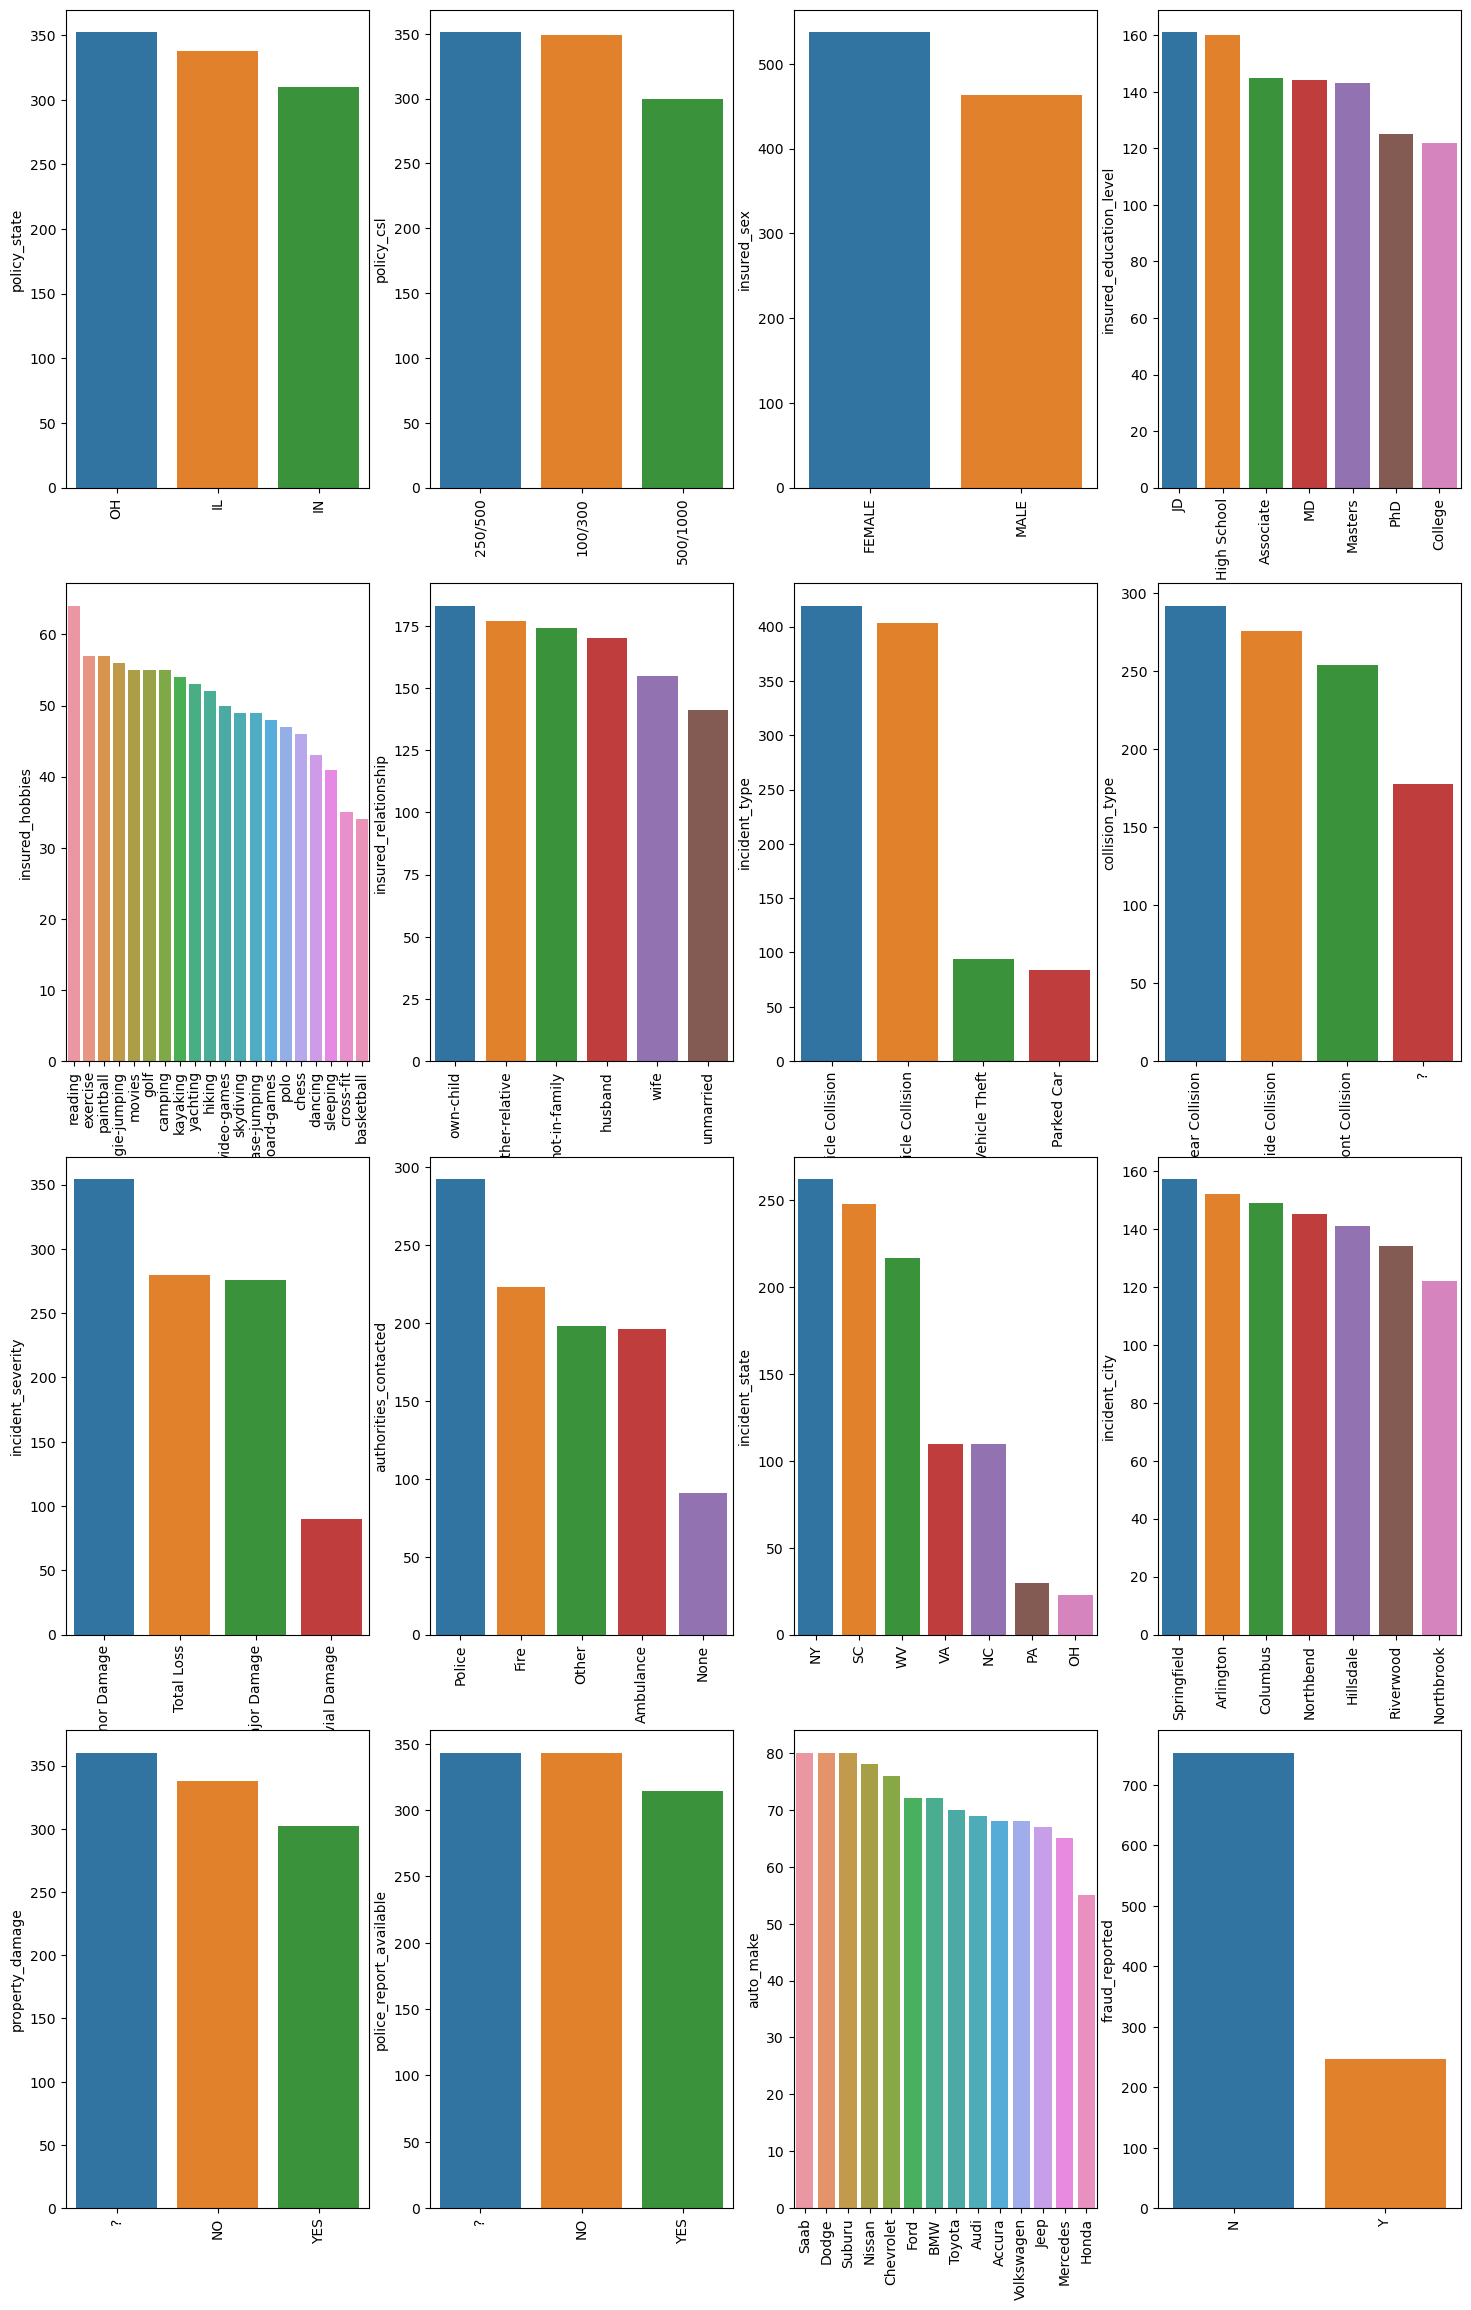

In [10]:
obj= (data.dtypes== 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1
for col in object_cols:
    y= data[col].value_counts()
    plt.subplot(5,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1
plt.show()

In [11]:
lab_enc= LabelEncoder()

In [12]:
obj= (data.dtypes=='object')
for col in list(obj[obj].index):
    data[col]= lab_enc.fit_transform(data[col])

In [13]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [14]:
auto_make= pd.crosstab(data['auto_make'],data['fraud_reported'])

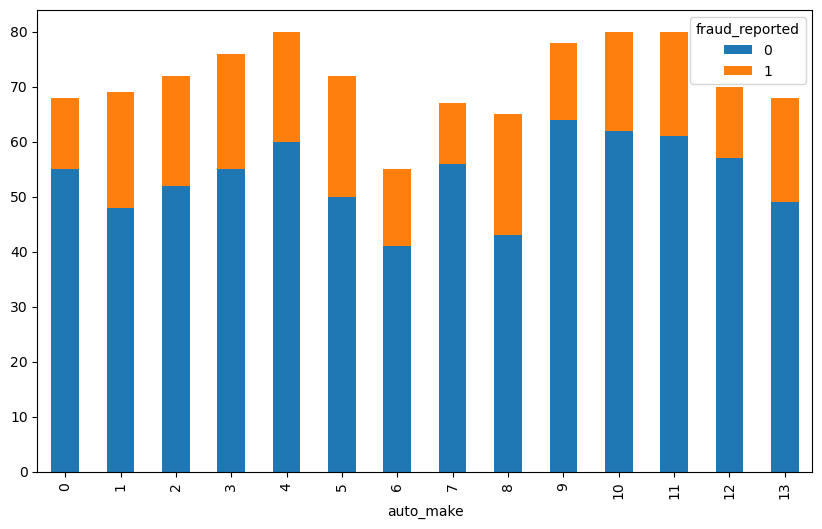

In [15]:
auto_make.plot.bar(stacked=True, figsize=(10,6))
plt.show()

In [16]:
insured_hobbies= pd.crosstab(data['insured_hobbies'],data['fraud_reported'])

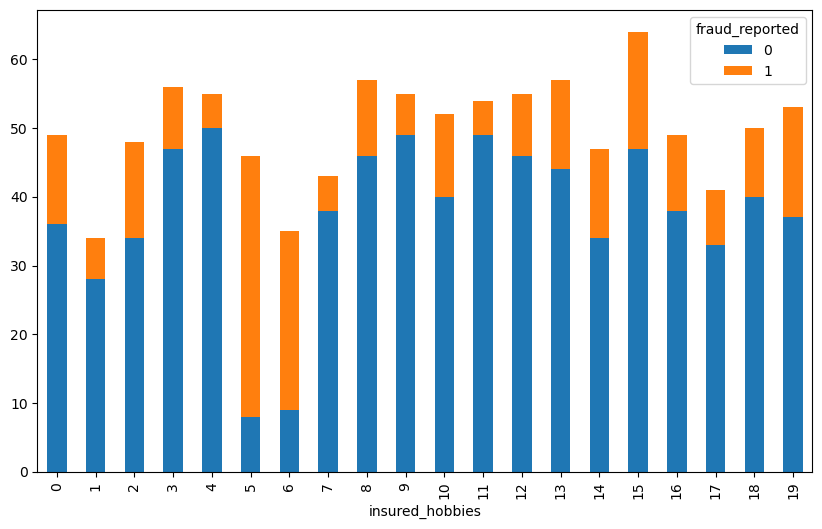

In [17]:
insured_hobbies.plot.bar(stacked=True, figsize=(10,6))
plt.show()

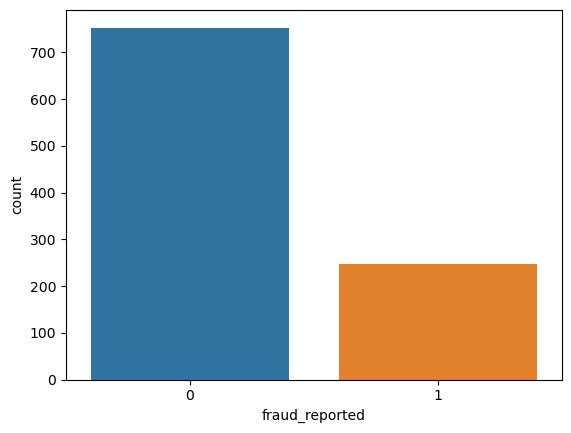

In [18]:
sns.countplot(data['fraud_reported'])
plt.show()

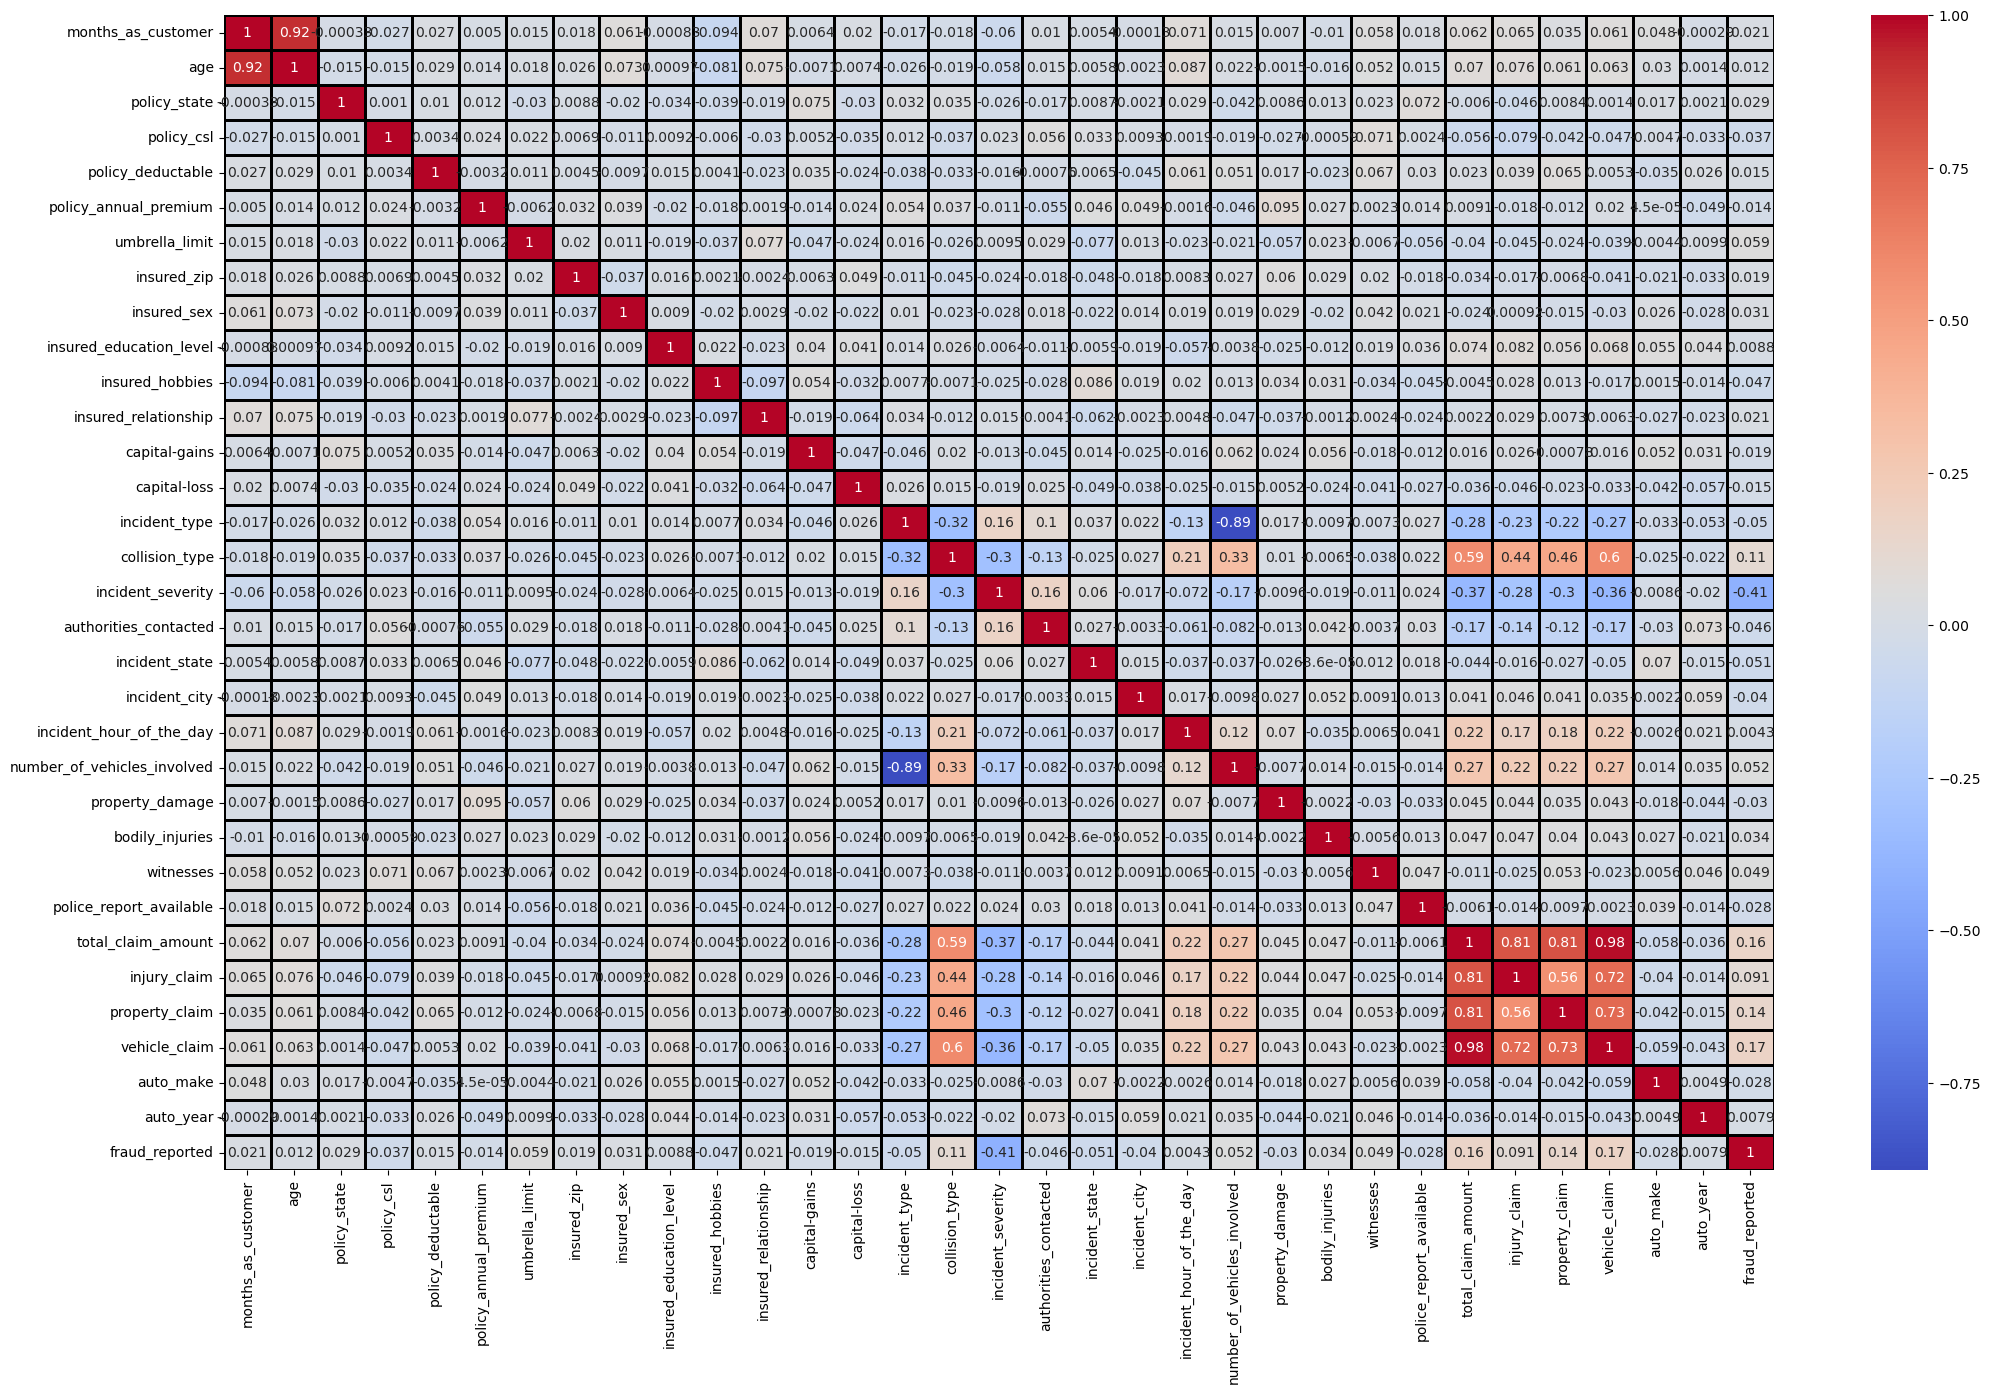

In [19]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm', linewidths=2, linecolor= 'black')
plt.show()

The total_claim_amount, injury_claim, property_claim, vehicle_claim are highly correlated with fraud_reported.

In [20]:
X_s= data.drop('fraud_reported',axis=1)
y= data['fraud_reported']

In [21]:
scaler= StandardScaler()
X= scaler.fit_transform(X_s)

In [22]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=100)

In [23]:
dtc= DecisionTreeClassifier()
rfc= RandomForestClassifier()
knn= KNeighborsClassifier()

In [24]:
for cls in (dtc, rfc, knn):
    cls.fit(X_train, y_train)
    y_pred= cls.predict(X_test)
    print("\n===Test Report===")
    print("Accuracy Score is ",cls.__class__.__name__,100*accuracy_score(y_test,y_pred))


===Test Report===
Accuracy Score is  DecisionTreeClassifier 79.5

===Test Report===
Accuracy Score is  RandomForestClassifier 77.5

===Test Report===
Accuracy Score is  KNeighborsClassifier 73.0


The test result shows 79.5% accuracy score of Decision Tree Classifier.

In [25]:
for cls in (dtc, rfc, knn):
    cls.fit(X_train, y_train)
    y_pred= cls.predict(X_train)
    print("\n===Train Report===")
    print("Accuracy Score is ",cls.__class__.__name__,100*accuracy_score(y_train,y_pred))


===Train Report===
Accuracy Score is  DecisionTreeClassifier 100.0

===Train Report===
Accuracy Score is  RandomForestClassifier 100.0

===Train Report===
Accuracy Score is  KNeighborsClassifier 80.75


The accuracy score of train data with decision tree classifier and random forest classifier is 100%

In [26]:
y_pred= cls.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[141,  13],
       [ 41,   5]], dtype=int64)

In [28]:
print("\n\n Test Classification Report \n",classification_report(y_test, y_pred, digits=2))



 Test Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84       154
           1       0.28      0.11      0.16        46

    accuracy                           0.73       200
   macro avg       0.53      0.51      0.50       200
weighted avg       0.66      0.73      0.68       200



This is the predictive model to predict if an insurance claim is fraudulent or not.